## Предсказываем внутренность дома с поворотами и сдвигами

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [1]:
!nvidia-smi

Sun Nov 19 11:50:19 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0   137W / 149W |   7187MiB / 11439MiB |     85%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import copy

import datetime

from shutil import copyfile
import os
import json

In [5]:
DESCRIPTION = """Предсказываем внутренность дома на 60 эпохах.
В минибатче происходят и повороты и сдвиги
Experiment_2017_11_19_11
"""

DATE = str(datetime.datetime.now())

DIR = './experiments/%s' % DATE

os.mkdir(DIR)

json.dump(DESCRIPTION, open(DIR + "/description.txt", "w"))
MODULES = ['dataset', 'unet', 'train_test_loader']

for m in MODULES:
    fname = "%s.py" % m
    copyfile(fname, DIR + '/' + fname)

[s, u, train_test_loader] = map(__import__, MODULES)

In [6]:
data_set = s.DataSet("./dataset/trainset", [s.ChannelPAN], image_size=(240,240))
ids = data_set.load()

train_ids, test_ids = train_test_loader.load_train_test()

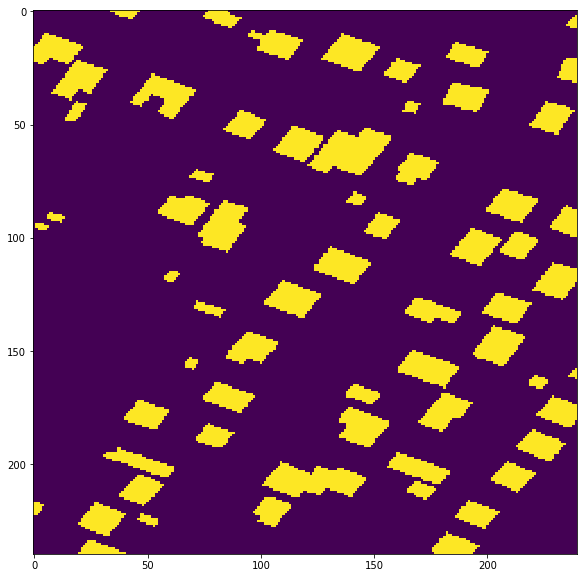

In [7]:
plt.figure(figsize=(10,10))
arr = data_set.get_mask(train_ids[3])
plt.imshow(arr)

In [8]:
net = u.UnetModel('classic-unet', data_set, DIR + "/model", lr=1e-4)

In [9]:
batch_generator = u.BatchGenerator(data_set, train_ids, random_rotate=True, shuffle_on_each_epoch=True, random_translate=True)

In [10]:
net.train(batch_generator, epochs=60, batch_size=10)

epoch: 0, loss: 1.154464
epoch: 0, loss: 1.111606
epoch: 0, loss: 1.071600
epoch: 0, loss: 1.069054
epoch: 0, loss: 1.038843
epoch: 0, loss: 1.042884
epoch: 0, loss: 1.023238
epoch: 0, loss: 0.989406
epoch: 0, loss: 0.950590
epoch: 0, loss: 0.949875
epoch: 0, loss: 0.925302
epoch: 0, loss: 0.908075
epoch: 0, loss: 0.913008
epoch: 0, loss: 0.888428
epoch: 0, loss: 0.892617
epoch: 0, loss: 0.822258
epoch: 0, loss: 0.832271
epoch: 0, loss: 0.821626
epoch: 0, loss: 0.810673
epoch: 0, loss: 0.778476
epoch: 0, loss: 0.774513
epoch: 0, loss: 0.778117
epoch: 0, loss: 0.744001
epoch: 0, loss: 0.727004
epoch: 0, loss: 0.723640
epoch: 0, loss: 0.737574
epoch: 0, loss: 0.724746
epoch: 0, loss: 0.690327
epoch: 0, loss: 0.697243
epoch: 0, loss: 0.711432
epoch: 0, loss: 0.674889
epoch: 0, loss: 0.684719
epoch: 0, loss: 0.676619
epoch: 0, loss: 0.665152
epoch: 0, loss: 0.656200
epoch: 0, loss: 0.647941
epoch: 0, loss: 0.636059
epoch: 0, loss: 0.632913
epoch: 0, loss: 0.655994
epoch: 0, loss: 0.628329


epoch: 5, loss: 0.286058
epoch: 5, loss: 0.308121
epoch: 5, loss: 0.299852
epoch: 5, loss: 0.272046
epoch: 5, loss: 0.295684
epoch: 5, loss: 0.304401
epoch: 5, loss: 0.274619
epoch: 5, loss: 0.273856
epoch: 5, loss: 0.275988
epoch: 5, loss: 0.287440
epoch: 5, loss: 0.292486
epoch: 5, loss: 0.276499
epoch: 5, loss: 0.275480
epoch: 5, loss: 0.278787
epoch: 5, loss: 0.281153
epoch: 5, loss: 0.308235
epoch: 5, loss: 0.287145
epoch: 5, loss: 0.288404
epoch: 5, loss: 0.271189
epoch: 5, loss: 0.257461
epoch: 5, loss: 0.260124
epoch: 5, loss: 0.277431
epoch: 5, loss: 0.248755
epoch: 5, loss: 0.305364
epoch: 5, loss: 0.275734
epoch: 5, loss: 0.266288
epoch: 5, loss: 0.265567
epoch: 5, loss: 0.271045
epoch: 5, loss: 0.266127
epoch: 5, loss: 0.259176
epoch: 5, loss: 0.272478
epoch: 5, loss: 0.256223
epoch: 5, loss: 0.334628
epoch: 5, loss: 0.268983
epoch: 5, loss: 0.301397
epoch: 5, loss: 0.248595
epoch: 5, loss: 0.290385
epoch: 5, loss: 0.280509
epoch: 5, loss: 0.274770
epoch: 5, loss: 0.274067


epoch: 10, loss: 0.232349
epoch: 10, loss: 0.209236
epoch: 10, loss: 0.241933
epoch: 10, loss: 0.228206
epoch: 10, loss: 0.213977
epoch: 10, loss: 0.276362
epoch: 10, loss: 0.268787
epoch: 10, loss: 0.246554
epoch: 10, loss: 0.229997
epoch: 10, loss: 0.262654
epoch: 10, loss: 0.285791
epoch: 10, loss: 0.264480
epoch: 10, loss: 0.229348
epoch: 10, loss: 0.223154
epoch: 10, loss: 0.246812
epoch: 10, loss: 0.229079
epoch: 10, loss: 0.213867
epoch: 10, loss: 0.233112
epoch: 10, loss: 0.223968
epoch: 10, loss: 0.227546
epoch: 10, loss: 0.220851
epoch: 10, loss: 0.330386
epoch: 10, loss: 0.209458
epoch: 10, loss: 0.248178
epoch: 10, loss: 0.211834
epoch: 10, loss: 0.239621
epoch: 10, loss: 0.218744
epoch: 10, loss: 0.258985
epoch: 10, loss: 0.209861
epoch: 10, loss: 0.229311
epoch: 10, loss: 0.236811
epoch: 10, loss: 0.202322
epoch: 10, loss: 0.211739
epoch: 10, loss: 0.249012
epoch: 10, loss: 0.236457
epoch: 10, loss: 0.224876
epoch: 10, loss: 0.188136
epoch: 10, loss: 0.222871
epoch: 10, l

epoch: 14, loss: 0.201300
epoch: 14, loss: 0.261942
epoch: 14, loss: 0.263596
epoch: 15, loss: 0.195961
epoch: 15, loss: 0.251654
epoch: 15, loss: 0.187157
epoch: 15, loss: 0.181610
epoch: 15, loss: 0.236373
epoch: 15, loss: 0.195526
epoch: 15, loss: 0.153051
epoch: 15, loss: 0.221334
epoch: 15, loss: 0.256449
epoch: 15, loss: 0.207162
epoch: 15, loss: 0.207616
epoch: 15, loss: 0.211412
epoch: 15, loss: 0.194295
epoch: 15, loss: 0.223559
epoch: 15, loss: 0.161845
epoch: 15, loss: 0.298780
epoch: 15, loss: 0.241076
epoch: 15, loss: 0.211910
epoch: 15, loss: 0.214976
epoch: 15, loss: 0.206118
epoch: 15, loss: 0.194274
epoch: 15, loss: 0.197413
epoch: 15, loss: 0.196740
epoch: 15, loss: 0.162686
epoch: 15, loss: 0.174030
epoch: 15, loss: 0.205623
epoch: 15, loss: 0.167404
epoch: 15, loss: 0.194579
epoch: 15, loss: 0.220366
epoch: 15, loss: 0.223832
epoch: 15, loss: 0.189911
epoch: 15, loss: 0.207269
epoch: 15, loss: 0.203653
epoch: 15, loss: 0.152674
epoch: 15, loss: 0.187600
epoch: 15, l

epoch: 19, loss: 0.149419
epoch: 19, loss: 0.178946
epoch: 19, loss: 0.120537
epoch: 19, loss: 0.174821
epoch: 19, loss: 0.151173
epoch: 19, loss: 0.184945
epoch: 19, loss: 0.180309
epoch: 19, loss: 0.224787
epoch: 19, loss: 0.141047
epoch: 19, loss: 0.215341
epoch: 19, loss: 0.230950
epoch: 19, loss: 0.154241
epoch: 20, loss: 0.169415
epoch: 20, loss: 0.186825
epoch: 20, loss: 0.186907
epoch: 20, loss: 0.199279
epoch: 20, loss: 0.188087
epoch: 20, loss: 0.187691
epoch: 20, loss: 0.199486
epoch: 20, loss: 0.167970
epoch: 20, loss: 0.228687
epoch: 20, loss: 0.168002
epoch: 20, loss: 0.143162
epoch: 20, loss: 0.203692
epoch: 20, loss: 0.212288
epoch: 20, loss: 0.222458
epoch: 20, loss: 0.178238
epoch: 20, loss: 0.129836
epoch: 20, loss: 0.208983
epoch: 20, loss: 0.162097
epoch: 20, loss: 0.219143
epoch: 20, loss: 0.144057
epoch: 20, loss: 0.110148
epoch: 20, loss: 0.163996
epoch: 20, loss: 0.178899
epoch: 20, loss: 0.176175
epoch: 20, loss: 0.133584
epoch: 20, loss: 0.140469
epoch: 20, l

epoch: 24, loss: 0.210268
epoch: 24, loss: 0.155783
epoch: 24, loss: 0.178089
epoch: 24, loss: 0.090800
epoch: 24, loss: 0.164208
epoch: 24, loss: 0.108735
epoch: 24, loss: 0.142809
epoch: 24, loss: 0.179950
epoch: 24, loss: 0.169543
epoch: 24, loss: 0.184765
epoch: 24, loss: 0.184498
epoch: 24, loss: 0.093801
epoch: 24, loss: 0.197661
epoch: 24, loss: 0.168353
epoch: 24, loss: 0.131952
epoch: 24, loss: 0.151248
epoch: 24, loss: 0.109686
epoch: 24, loss: 0.182023
epoch: 24, loss: 0.126691
epoch: 24, loss: 0.221725
epoch: 24, loss: 0.183552
epoch: 25, loss: 0.187501
epoch: 25, loss: 0.159012
epoch: 25, loss: 0.140532
epoch: 25, loss: 0.160947
epoch: 25, loss: 0.149351
epoch: 25, loss: 0.188333
epoch: 25, loss: 0.181990
epoch: 25, loss: 0.113150
epoch: 25, loss: 0.122832
epoch: 25, loss: 0.223706
epoch: 25, loss: 0.143370
epoch: 25, loss: 0.114462
epoch: 25, loss: 0.202505
epoch: 25, loss: 0.138898
epoch: 25, loss: 0.169790
epoch: 25, loss: 0.107027
epoch: 25, loss: 0.177250
epoch: 25, l

epoch: 29, loss: 0.154780
epoch: 29, loss: 0.119449
epoch: 29, loss: 0.107761
epoch: 29, loss: 0.181132
epoch: 29, loss: 0.091905
epoch: 29, loss: 0.151485
epoch: 29, loss: 0.125056
epoch: 29, loss: 0.136565
epoch: 29, loss: 0.105880
epoch: 29, loss: 0.145125
epoch: 29, loss: 0.253189
epoch: 29, loss: 0.143589
epoch: 29, loss: 0.146515
epoch: 29, loss: 0.137074
epoch: 29, loss: 0.119258
epoch: 29, loss: 0.175339
epoch: 29, loss: 0.119526
epoch: 29, loss: 0.221524
epoch: 29, loss: 0.160114
epoch: 29, loss: 0.113297
epoch: 29, loss: 0.192978
epoch: 29, loss: 0.114491
epoch: 29, loss: 0.123554
epoch: 29, loss: 0.144391
epoch: 29, loss: 0.119849
epoch: 29, loss: 0.160204
epoch: 29, loss: 0.129911
epoch: 29, loss: 0.195756
epoch: 29, loss: 0.072606
epoch: 29, loss: 0.147467
epoch: 30, loss: 0.133882
epoch: 30, loss: 0.150910
epoch: 30, loss: 0.156849
epoch: 30, loss: 0.129833
epoch: 30, loss: 0.121585
epoch: 30, loss: 0.131430
epoch: 30, loss: 0.191520
epoch: 30, loss: 0.110894
epoch: 30, l

epoch: 34, loss: 0.129592
epoch: 34, loss: 0.222930
epoch: 34, loss: 0.129365
epoch: 34, loss: 0.142254
epoch: 34, loss: 0.101385
epoch: 34, loss: 0.214815
epoch: 34, loss: 0.156255
epoch: 34, loss: 0.124225
epoch: 34, loss: 0.142480
epoch: 34, loss: 0.107066
epoch: 34, loss: 0.158044
epoch: 34, loss: 0.162182
epoch: 34, loss: 0.057924
epoch: 34, loss: 0.088075
epoch: 34, loss: 0.166362
epoch: 34, loss: 0.085603
epoch: 34, loss: 0.144122
epoch: 34, loss: 0.137145
epoch: 34, loss: 0.139603
epoch: 34, loss: 0.158276
epoch: 34, loss: 0.080967
epoch: 34, loss: 0.115873
epoch: 34, loss: 0.190485
epoch: 34, loss: 0.107620
epoch: 34, loss: 0.154463
epoch: 34, loss: 0.186846
epoch: 34, loss: 0.147541
epoch: 34, loss: 0.182198
epoch: 34, loss: 0.101931
epoch: 34, loss: 0.118746
epoch: 34, loss: 0.112574
epoch: 34, loss: 0.128358
epoch: 34, loss: 0.110839
epoch: 34, loss: 0.091465
epoch: 34, loss: 0.155977
epoch: 34, loss: 0.129013
epoch: 34, loss: 0.153333
epoch: 34, loss: 0.137716
epoch: 34, l

epoch: 39, loss: 0.075124
epoch: 39, loss: 0.077269
epoch: 39, loss: 0.179403
epoch: 39, loss: 0.090994
epoch: 39, loss: 0.103174
epoch: 39, loss: 0.094460
epoch: 39, loss: 0.134916
epoch: 39, loss: 0.111513
epoch: 39, loss: 0.121504
epoch: 39, loss: 0.125998
epoch: 39, loss: 0.181564
epoch: 39, loss: 0.150919
epoch: 39, loss: 0.130699
epoch: 39, loss: 0.140435
epoch: 39, loss: 0.166212
epoch: 39, loss: 0.106189
epoch: 39, loss: 0.138855
epoch: 39, loss: 0.102586
epoch: 39, loss: 0.109615
epoch: 39, loss: 0.106689
epoch: 39, loss: 0.141219
epoch: 39, loss: 0.145020
epoch: 39, loss: 0.137291
epoch: 39, loss: 0.139740
epoch: 39, loss: 0.100861
epoch: 39, loss: 0.133626
epoch: 39, loss: 0.091274
epoch: 39, loss: 0.087314
epoch: 39, loss: 0.103416
epoch: 39, loss: 0.145227
epoch: 39, loss: 0.162585
epoch: 39, loss: 0.067316
epoch: 39, loss: 0.150718
epoch: 39, loss: 0.166980
epoch: 39, loss: 0.144702
epoch: 39, loss: 0.088975
epoch: 39, loss: 0.120206
epoch: 39, loss: 0.110035
epoch: 39, l

epoch: 44, loss: 0.085744
epoch: 44, loss: 0.143951
epoch: 44, loss: 0.079302
epoch: 44, loss: 0.148288
epoch: 44, loss: 0.130039
epoch: 44, loss: 0.104258
epoch: 44, loss: 0.129809
epoch: 44, loss: 0.126268
epoch: 44, loss: 0.050722
epoch: 44, loss: 0.076358
epoch: 44, loss: 0.176515
epoch: 44, loss: 0.067688
epoch: 44, loss: 0.182560
epoch: 44, loss: 0.088033
epoch: 44, loss: 0.118266
epoch: 44, loss: 0.098888
epoch: 44, loss: 0.156641
epoch: 44, loss: 0.124713
epoch: 44, loss: 0.135755
epoch: 44, loss: 0.149702
epoch: 44, loss: 0.091690
epoch: 44, loss: 0.116589
epoch: 44, loss: 0.131768
epoch: 44, loss: 0.162434
epoch: 44, loss: 0.114668
epoch: 44, loss: 0.101975
epoch: 44, loss: 0.161982
epoch: 44, loss: 0.079380
epoch: 44, loss: 0.062951
epoch: 44, loss: 0.092780
epoch: 44, loss: 0.081771
epoch: 44, loss: 0.124500
epoch: 44, loss: 0.120200
epoch: 44, loss: 0.097551
epoch: 44, loss: 0.081401
epoch: 44, loss: 0.070567
epoch: 44, loss: 0.187814
epoch: 44, loss: 0.088901
epoch: 44, l

epoch: 48, loss: 0.224144
epoch: 49, loss: 0.094216
epoch: 49, loss: 0.135614
epoch: 49, loss: 0.134647
epoch: 49, loss: 0.152644
epoch: 49, loss: 0.102773
epoch: 49, loss: 0.091356
epoch: 49, loss: 0.083492
epoch: 49, loss: 0.115827
epoch: 49, loss: 0.107597
epoch: 49, loss: 0.084365
epoch: 49, loss: 0.106850
epoch: 49, loss: 0.094870
epoch: 49, loss: 0.060328
epoch: 49, loss: 0.165025
epoch: 49, loss: 0.064315
epoch: 49, loss: 0.074503
epoch: 49, loss: 0.091320
epoch: 49, loss: 0.140709
epoch: 49, loss: 0.098033
epoch: 49, loss: 0.112844
epoch: 49, loss: 0.072445
epoch: 49, loss: 0.067286
epoch: 49, loss: 0.068577
epoch: 49, loss: 0.151348
epoch: 49, loss: 0.084866
epoch: 49, loss: 0.192374
epoch: 49, loss: 0.116410
epoch: 49, loss: 0.122979
epoch: 49, loss: 0.112631
epoch: 49, loss: 0.089409
epoch: 49, loss: 0.139902
epoch: 49, loss: 0.085627
epoch: 49, loss: 0.117184
epoch: 49, loss: 0.170463
epoch: 49, loss: 0.108057
epoch: 49, loss: 0.145413
epoch: 49, loss: 0.132054
epoch: 49, l

epoch: 53, loss: 0.070463
epoch: 53, loss: 0.122363
epoch: 53, loss: 0.151491
epoch: 53, loss: 0.178260
epoch: 53, loss: 0.111347
epoch: 53, loss: 0.131821
epoch: 53, loss: 0.075483
epoch: 53, loss: 0.122203
epoch: 53, loss: 0.092375
epoch: 53, loss: 0.079444
epoch: 54, loss: 0.112289
epoch: 54, loss: 0.101489
epoch: 54, loss: 0.081612
epoch: 54, loss: 0.055341
epoch: 54, loss: 0.103378
epoch: 54, loss: 0.078927
epoch: 54, loss: 0.136640
epoch: 54, loss: 0.082319
epoch: 54, loss: 0.142722
epoch: 54, loss: 0.108416
epoch: 54, loss: 0.067612
epoch: 54, loss: 0.110278
epoch: 54, loss: 0.087535
epoch: 54, loss: 0.125307
epoch: 54, loss: 0.083036
epoch: 54, loss: 0.152118
epoch: 54, loss: 0.094067
epoch: 54, loss: 0.067146
epoch: 54, loss: 0.077552
epoch: 54, loss: 0.065263
epoch: 54, loss: 0.127922
epoch: 54, loss: 0.130397
epoch: 54, loss: 0.086353
epoch: 54, loss: 0.203189
epoch: 54, loss: 0.165847
epoch: 54, loss: 0.153770
epoch: 54, loss: 0.050956
epoch: 54, loss: 0.144002
epoch: 54, l

epoch: 58, loss: 0.127654
epoch: 58, loss: 0.131155
epoch: 58, loss: 0.072320
epoch: 58, loss: 0.117470
epoch: 58, loss: 0.082874
epoch: 58, loss: 0.085127
epoch: 58, loss: 0.064711
epoch: 58, loss: 0.174066
epoch: 58, loss: 0.153936
epoch: 58, loss: 0.094833
epoch: 58, loss: 0.115095
epoch: 58, loss: 0.072538
epoch: 58, loss: 0.089451
epoch: 58, loss: 0.152515
epoch: 58, loss: 0.106385
epoch: 58, loss: 0.055319
epoch: 58, loss: 0.187754
epoch: 58, loss: 0.109544
epoch: 58, loss: 0.328121
epoch: 59, loss: 0.134352
epoch: 59, loss: 0.160272
epoch: 59, loss: 0.066499
epoch: 59, loss: 0.092987
epoch: 59, loss: 0.139137
epoch: 59, loss: 0.132128
epoch: 59, loss: 0.073484
epoch: 59, loss: 0.101450
epoch: 59, loss: 0.065596
epoch: 59, loss: 0.168034
epoch: 59, loss: 0.143517
epoch: 59, loss: 0.064202
epoch: 59, loss: 0.042190
epoch: 59, loss: 0.108781
epoch: 59, loss: 0.122980
epoch: 59, loss: 0.095514
epoch: 59, loss: 0.103725
epoch: 59, loss: 0.160578
epoch: 59, loss: 0.104255
epoch: 59, l